<a href="https://colab.research.google.com/github/Priyanshi1704/Machine-LearningLab/blob/main/ML_mini_project_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mini Project : credit card fraud detection using neural networks

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('default-of-credit-card-clients.csv')


In [ ]:
print(df.columns)
print(df.shape)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
(30000, 25)


In [ ]:
df = df.drop('ID', axis = 1)
#Look at the number and name of columns in dataset.
print(df.columns)
print(df.shape)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
(30000, 24)


In [ ]:
#Check the info() of the dataset whether all the columns in dataset have the same datatype or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [ ]:
#Checking for missing values
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

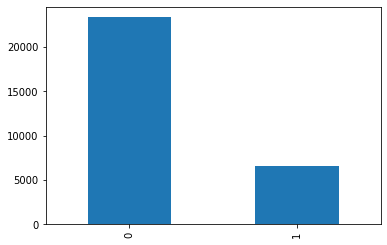

In [ ]:
# Check the distribution of class labels
df['default payment next month'].value_counts().plot.bar()
# class distributions are highly imbalanced

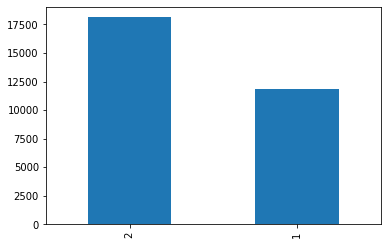

In [ ]:
df['SEX'].value_counts().plot.bar()
# It finds that The number of Male credit holder is less than Female.

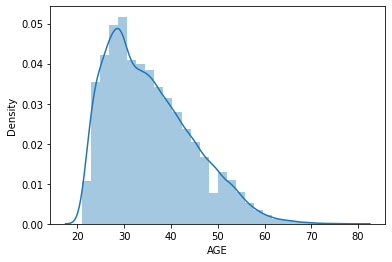

In [ ]:
sns.distplot(df['AGE'],kde=True,bins=30)
# There is a large number of clients whose age is between 25 to 40

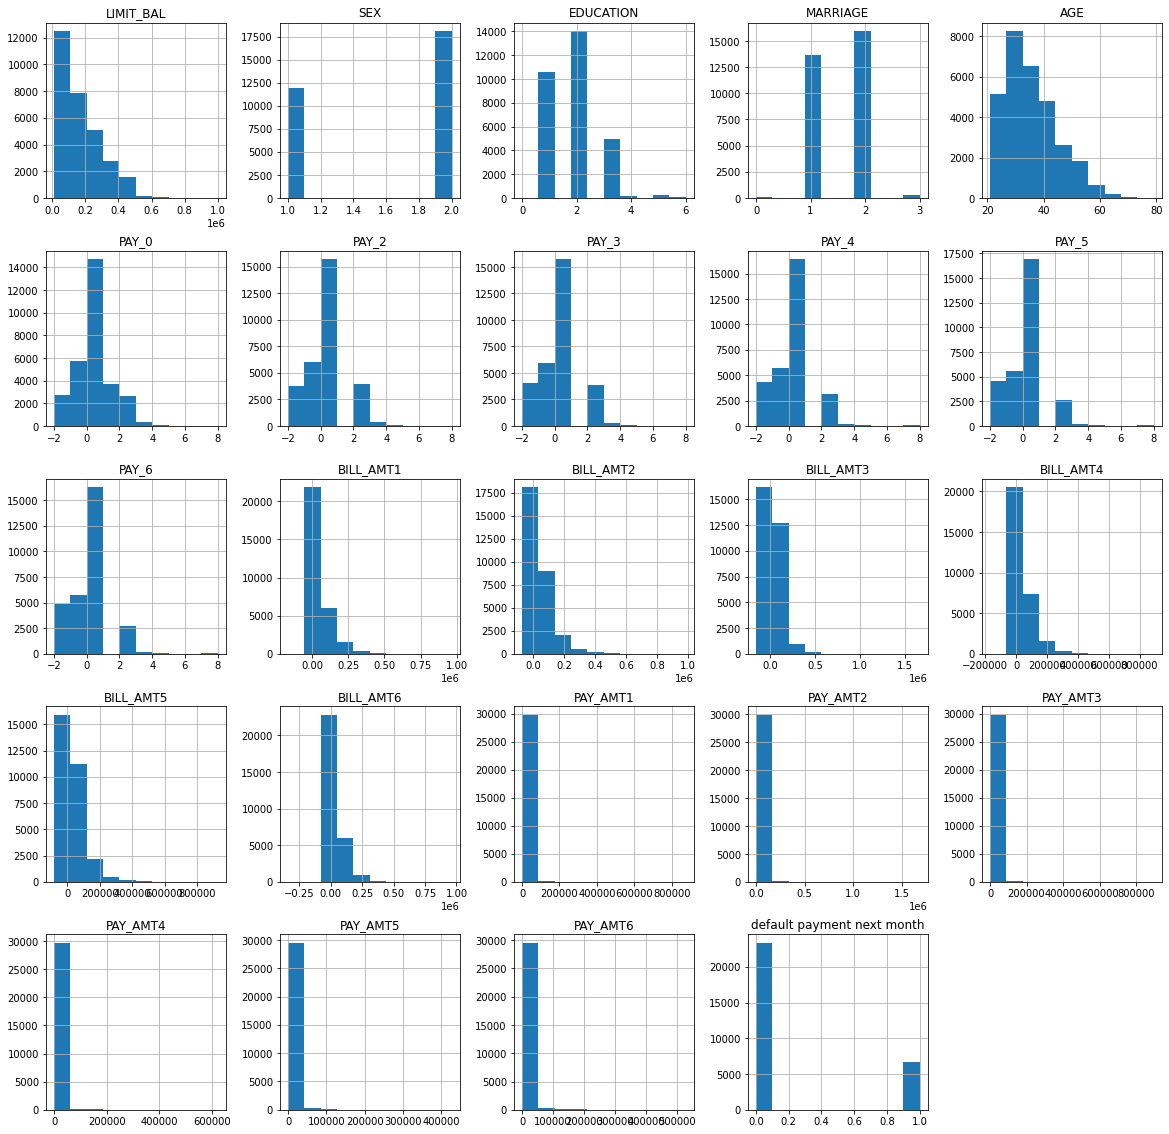

In [ ]:
# Plot histograms of each parameter 
df.hist(figsize = (20, 20))
plt.show()

In [ ]:
# Determine number of fraud cases in dataset
Fraud = df[df['default payment next month'] == 1]
Valid = df[df['default payment next month'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(df[df['default payment next month'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['default payment next month'] == 0])))

0.2840267077555213
Fraud Cases: 6636
Valid Transactions: 23364


In [ ]:
LABELS=["Valid","Fraud"]

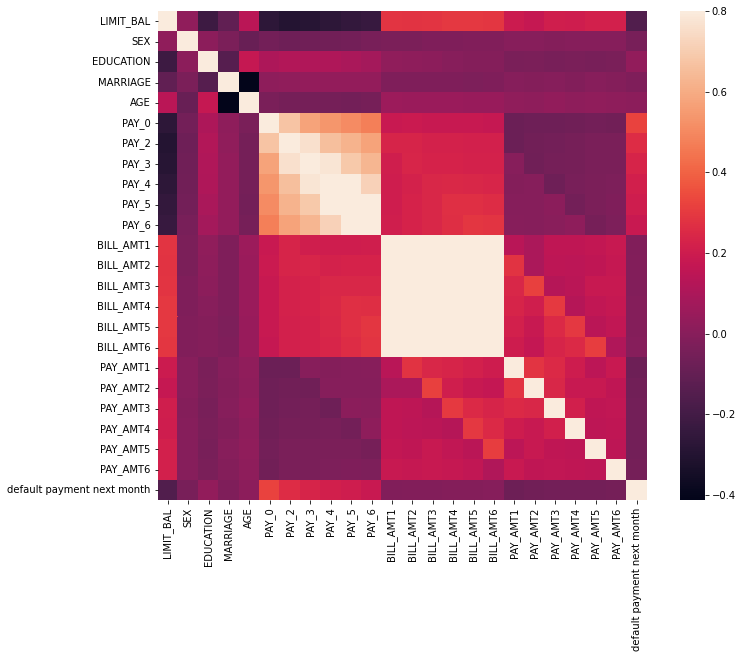

In [ ]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

#data preprocessing

In [ ]:
df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [ ]:
# There is some double-digit count of values of the PAY_0 data feature and for some data features also. So we will create one single category of all low categories having less count.
fill = (df.PAY_0 == 4) | (df.PAY_0==5) | (df.PAY_0==6) | (df.PAY_0==7) | (df.PAY_0==8)
df.loc[fill,'PAY_0']=4
df.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4      141
Name: PAY_0, dtype: int64

In [ ]:
fill = (df.PAY_2 == 4) | (df.PAY_2 == 1) | (df.PAY_2 == 5) | (df.PAY_2 == 7) | (df.PAY_2 == 6) | (df.PAY_2 == 8)
df.loc[fill,'PAY_2']=4
#df.PAY_2.value_counts()
fill = (df.PAY_3 == 4) | (df.PAY_3 == 1) | (df.PAY_3 == 5) | (df.PAY_3 == 7) | (df.PAY_3 == 6) | (df.PAY_3 == 8)
df.loc[fill,'PAY_3']=4
#df.PAY_3.value_counts()
fill = (df.PAY_4 == 4) | (df.PAY_4 == 1) | (df.PAY_4 == 5) | (df.PAY_4 == 7) | (df.PAY_4 == 6) | (df.PAY_4 == 8)
df.loc[fill,'PAY_4']=4
#df.PAY_4.value_counts()
fill = (df.PAY_5 == 4) | (df.PAY_5 == 7) | (df.PAY_5 == 5) | (df.PAY_5 == 6) | (df.PAY_5 == 8)
df.loc[fill,'PAY_5']=4
#df.PAY_5.value_counts()
fill = (df.PAY_6 == 4) | (df.PAY_6 == 7) | (df.PAY_6 == 5) | (df.PAY_6 == 6) | (df.PAY_6 == 8)
df.loc[fill,'PAY_6']=4
#df.PAY_6.value_counts()

In [ ]:
df.columns = df.columns.map(str.lower)
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
#you can inbuilt StandardScalar() or MinMaxScalar() also
df[col_to_norm] = df[col_to_norm].apply(lambda x :( x-np.mean(x))/np.std(x))
#df.head()

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

#5 fold

In [ ]:
# shuffel the dataset
X, y = shuffle(X, y, random_state=100)

In [ ]:
def fold(features,y_actual):
  kf = KFold(n_splits=5,random_state=1000, shuffle=True)
  kf.get_n_splits(features)
  all_x_train = []
  all_x_test = []
  all_y_train = []
  all_y_test = []
  for train_index, test_index in kf.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = y_actual[train_index], y_actual[test_index]
    all_x_train.append(X_train)
    all_x_test.append(X_test)
    all_y_train.append(y_train)
    all_y_test.append(y_test)
  all_x_train, all_x_test, all_y_train, all_y_test  = np.array(all_x_train), np.array(all_x_test), np.array(all_y_train), np.array(all_y_test)
  for i in range(0, 5):
    all_y_train[i] = all_y_train[i].flatten()
  return all_x_train, all_x_test, all_y_train, all_y_test

In [ ]:
all_x_train, all_x_test, all_y_train, all_y_test = fold(X, y)

In [ ]:
set(all_y_train[0])
# as we have yes or no in output label

{0, 1}

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
#Start with logistic regression model
for i in range(0, 5): # for 5 fold
  print("For fold no:", i+1)
  print("-"*100)
  logistic_reg_classifier = LogisticRegression(penalty = 'none', random_state=10, solver = 'sag', max_iter = 2).fit(all_x_train[i], all_y_train[i])
  print("Accuracy on training data: " + str(logistic_reg_classifier.score(all_x_train[i], all_y_train[i])*100) + "%")
  predicted = logistic_reg_classifier.predict(all_x_test[i])
  print("Testing Accuracy Score: " + str(accuracy_score(all_y_test[i], predicted)*100))
  print('Confusion Matrix : \n' + str(confusion_matrix(all_y_test[i], predicted)))
  print("Classification Report for 2-classes: ")
  out_labels = [0, 1]
  print(classification_report(all_y_test[i], predicted, out_labels, digits=5))
  print("-"*100)

For fold no: 1
----------------------------------------------------------------------------------------------------
Accuracy on training data: 81.54166666666667%
Testing Accuracy Score: 81.06666666666666
Confusion Matrix : 
[[4420  213]
 [ 923  444]]
Classification Report for 2-classes: 
              precision    recall  f1-score   support

           0    0.82725   0.95403   0.88613      4633
           1    0.67580   0.32480   0.43874      1367

    accuracy                        0.81067      6000
   macro avg    0.75152   0.63941   0.66243      6000
weighted avg    0.79274   0.81067   0.78420      6000

----------------------------------------------------------------------------------------------------
For fold no: 2
----------------------------------------------------------------------------------------------------
Accuracy on training data: 81.31666666666668%
Testing Accuracy Score: 82.05
Confusion Matrix : 
[[4504  196]
 [ 881  419]]
Classification Report for 2-classes: 
      

#Sigmoid Neuron

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# it's slp
class SigmoidNeuron:
    def __init__(self, epoch = 10, roh=1e-3):
        self.epoch = epoch
        self.roh = roh

    def predict(self, X):
        return self.predict_(self.add_bias(X))
    
    def predict_(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
  
    def add_bias(self, X):
        return np.insert(X, 0, 1, axis=1)

    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
    def score(self, X, y):
        return np.mean(self.predict_classes(X) == y)
    
    def evaluate_(self, X, y):
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))

    def logloss(self, y, probs):
        return np.mean(-y*np.log(probs) - (1-y)*np.log(1-probs))

    def cross_entropy(self, y, probs):
        return -1 * np.mean(y * np.log(probs))

    def mse(self, y, probs):
        return (((y - probs)**2).mean())/2
        
    def fit(self, X, y, lr=0.1, rand_seed=4, verbose=False):
        np.random.seed(rand_seed) 
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))*0.1
        self.fit_data(X, y, lr, verbose)
        return self
 
    def fit_data(self, X, y, lr, verbose):
        i = 0
        xt, yt = all_x_test[0], all_y_test[0]
        xtr, ytr = all_x_train[0], all_y_train[0]
        while (not self.epoch or i < self.epoch):
            self.loss.append(self.mse(y, self.predict_(X)))
            error = y - self.predict_(X)
            update = (lr * np.dot(error.T, X))
            self.weights += update
            if np.abs(update).max() < self.roh: break
            i +=1

In [ ]:
for i in range(0, 5): # for 5 fold
  print("For fold no:", i+1)
  print("-"*100)
  sgn = SigmoidNeuron(roh=1e-5)
  sgn.fit(all_x_train[0], all_y_train[0], lr=0.01)
  print("Accuracy on training data: " + str(sgn.score(all_x_train[i], all_y_train[i])*100) + "%")
  predicted = sgn.predict_classes(all_x_test[i])
  print("Testing Accuracy Score: " + str(accuracy_score(all_y_test[i], predicted)*100))
  print('Confusion Matrix : \n' + str(confusion_matrix(all_y_test[i], predicted)))
  print("Classification Report for 2-classes: ")
  out_labels = [0, 1]
  print(classification_report(all_y_test[i], predicted, out_labels, digits=5))
  print("-"*100)

For fold no: 1
----------------------------------------------------------------------------------------------------
Accuracy on training data: 78.04583333333333%
Testing Accuracy Score: 77.21666666666667
Confusion Matrix : 
[[4633    0]
 [1367    0]]
Classification Report for 2-classes: 
              precision    recall  f1-score   support

           0    0.77217   1.00000   0.87144      4633
           1    0.00000   0.00000   0.00000      1367

    accuracy                        0.77217      6000
   macro avg    0.38608   0.50000   0.43572      6000
weighted avg    0.59624   0.77217   0.67290      6000

----------------------------------------------------------------------------------------------------
For fold no: 2
----------------------------------------------------------------------------------------------------
Accuracy on training data: 77.76666666666667%
Testing Accuracy Score: 78.33333333333333
Confusion Matrix : 
[[4700    0]
 [1300    0]]
Classification Report for 2-clas

#Single Layer Perceptron

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# it's slp
class SLP:
    def __init__(self, epoch = 10, roh=1e-3):
        self.epoch = epoch
        self.roh = roh

    def predict(self, X):
        return self.predict_(self.add_bias(X))
    
    def predict_(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
  
    def add_bias(self, X):
        return np.insert(X, 0, 1, axis=1)

    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
    def score(self, X, y):
        return np.mean(self.predict_classes(X) == y)
    
    def evaluate_(self, X, y):
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))

    def logloss(self, y, probs):
        return np.mean(-y*np.log(probs) - (1-y)*np.log(1-probs))

    def cross_entropy(self, y, probs):
        return -1 * np.mean(y * np.log(probs))

    def mse(self, y, probs):
        return (((y - probs)**2).mean())/2
        
    def fit(self, X, y, lr=0.1, rand_seed=4, verbose=False):
        np.random.seed(rand_seed) 
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))*0.1
        self.fit_data(X, y, lr, verbose)
        return self
 
    def fit_data(self, X, y, lr, verbose):
        i = 0
        xt, yt = all_x_test[0], all_y_test[0]
        xtr, ytr = all_x_train[0], all_y_train[0]
        while (not self.epoch or i < self.epoch):
            self.loss.append(self.mse(y, self.predict_(X)))
            # put the thershold function on the predicted value i.e. here self.predict_(X)
            temp = self.predict_(X)
            for i in range(0, temp.shape[0]):
              for j in range(0, temp.shape[1]):
                if(temp[i][j]>=0.5):
                  temp[i][j] = 1
                else:
                  temp[i][j] = 0
            error = y - temp
            update = (lr * np.dot(error.T, X))
            self.weights += update
            if np.abs(update).max() < self.roh: break
            i +=1

In [ ]:
for i in range(0, 5): # for 5 fold
  print("For fold no:", i+1)
  print("-"*100)
  slp = SLP(roh=1e-5)
  slp.fit(all_x_train[0], all_y_train[0], lr=0.01)
  print("Accuracy on training data: " + str(slp.score(all_x_train[i], all_y_train[i])*100) + "%")
  predicted = slp.predict_classes(all_x_test[i])
  print("Testing Accuracy Score: " + str(accuracy_score(all_y_test[i], predicted)*100))
  print('Confusion Matrix : \n' + str(confusion_matrix(all_y_test[i], predicted)))
  print("Classification Report for 2-classes: ")
  out_labels = [0, 1]
  print(classification_report(all_y_test[i], predicted, out_labels, digits=5))
  print("-"*100)

For fold no: 1
----------------------------------------------------------------------------------------------------
Accuracy on training data: 78.4%
Testing Accuracy Score: 77.64999999999999
Confusion Matrix : 
[[4615   18]
 [1323   44]]
Classification Report for 2-classes: 
              precision    recall  f1-score   support

           0    0.77720   0.99611   0.87314      4633
           1    0.70968   0.03219   0.06158      1367

    accuracy                        0.77650      6000
   macro avg    0.74344   0.51415   0.46736      6000
weighted avg    0.76181   0.77650   0.68824      6000

----------------------------------------------------------------------------------------------------
For fold no: 2
----------------------------------------------------------------------------------------------------
Accuracy on training data: 78.0875%
Testing Accuracy Score: 78.9
Confusion Matrix : 
[[4685   15]
 [1251   49]]
Classification Report for 2-classes: 
              precision    rec

#MLP (with only one hidden layer)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
for i in range(0, 5): # for 5 fold
  print("For fold no:", i+1)
  print("-"*100)
  mlp = MLPClassifier(hidden_layer_sizes=(100), activation='logistic',solver='sgd', random_state=1, max_iter=100).fit(all_x_train[0], all_y_train[0])
  mlp.predict(all_x_train[0])
  print("Accuracy on training data: " + str(mlp.score(all_x_train[i], all_y_train[i])*100) + "%")
  predicted = mlp.predict(all_x_test[i])
  print("Testing Accuracy Score: " + str(accuracy_score(all_y_test[i], predicted)*100))
  print('Confusion Matrix : \n' + str(confusion_matrix(all_y_test[i], predicted)))
  print("Classification Report for 2-classes: ")
  out_labels = [0, 1]
  print(classification_report(all_y_test[i], predicted, out_labels, digits=5))
  print("-"*100)

For fold no: 1
----------------------------------------------------------------------------------------------------
Accuracy on training data: 81.05833333333334%
Testing Accuracy Score: 80.48333333333333
Confusion Matrix : 
[[4482  151]
 [1020  347]]
Classification Report for 2-classes: 
              precision    recall  f1-score   support

           0    0.81461   0.96741   0.88446      4633
           1    0.69679   0.25384   0.37212      1367

    accuracy                        0.80483      6000
   macro avg    0.75570   0.61062   0.62829      6000
weighted avg    0.78777   0.80483   0.76773      6000

----------------------------------------------------------------------------------------------------
For fold no: 2
----------------------------------------------------------------------------------------------------
Accuracy on training data: 80.80416666666666%
Testing Accuracy Score: 81.5
Confusion Matrix : 
[[4547  153]
 [ 957  343]]
Classification Report for 2-classes: 
       